# K-Nearest Neighbors: Public Health
<span style="color: red; font-weight: bold;">Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.</span>

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

## Summary

This notebook provides a comprehensive demonstration of applying the K-Nearest Neighbors (KNN) algorithm for both <u>classification</u> and <u>regression</u> tasks using a **synthetic** public health dataset. The dataset includes the following columns: 

1. **ID**: A unique identifier for each individual.
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (Male/Female).
4. **BMI**: Body Mass Index, a measure of body fat based on height and weight.
5. **Smoking Status**: The smoking status of the individual (Never, Former, Current).
6. **Exercise Frequency**: The frequency of exercise per week.
7. **Cholesterol Level**: The cholesterol level of the individual.
8. **Blood Pressure**: The blood pressure of the individual.
9. **Health Risk Score**: A calculated score representing the overall health risk of the individual.
10. **Health Risk Category**: The health risk category of the individual (Low, Medium, High).

### Goal:

The goal is to predict health risk scores (for regression) and health risk categories (for classification) based on features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, and blood pressure.

## Importing Libraries

We will start by importing the necessary libraries.

In [68]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

We will load the public health dataset that contains features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, blood pressure, <u>health risk score (for regression)</u>, and <u>health risk category (for classification)</u>.

In [2]:
# Loading the Dataset
# Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.
dataset = pd.read_csv('public_health_dataset.csv')
dataset.head()

,ID,Age,Gender,BMI,Smoking Status,Exercise Frequency,Cholesterol Level,Blood Pressure,Health Risk Score,Health Risk Category
0,1,62,Female,22.812775,Former,4,119.690569,104.027015,74.966827,Medium
1,2,65,Female,18.902457,Former,0,151.031562,106.691143,78.305866,Medium
2,3,82,Female,31.286677,Former,0,167.483621,87.811173,95.605578,Medium
3,4,85,Male,23.427027,Former,2,124.839669,91.354148,80.921337,Medium
4,5,85,Female,25.755887,Former,6,192.860153,121.826556,95.150886,Medium


# <span style="color: blue;">1. KNN Classification</span>

**Objective**: Classify individuals into different health risk categories (Low, Medium, High) based on features such as age, BMI, exercise frequency, cholesterol level, and blood pressure.

## Encoding the Categorical Target Variable

We will encode the categorical target variable (Health Risk Category) to numerical values for classification.

In [ ]:
# KNN Classification
# Objective: Classify individuals into different health risk categories (Low, Medium, High) based on features such as age, BMI, exercise frequency, cholesterol level, and blood pressure.

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_classification = label_encoder.fit_transform(dataset['Health Risk Category'])

## Selecting Features

We will select the relevant features for the classification task.

In [26]:
# Selecting features
X = dataset[['Age', 'BMI', 'Exercise Frequency', 'Cholesterol Level', 'Blood Pressure']].values

## Splitting the Dataset

We will split the dataset into the training set and test set.

In [27]:
# Splitting the dataset into the Training set and Test set
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.25, random_state=0)

## Feature Scaling

We will scale the features to ensure they are on the same scale.

In [37]:
# Feature Scaling
sc_class = StandardScaler()
X_train_class = sc_class.fit_transform(X_train_class)
X_test_class = sc_class.transform(X_test_class)

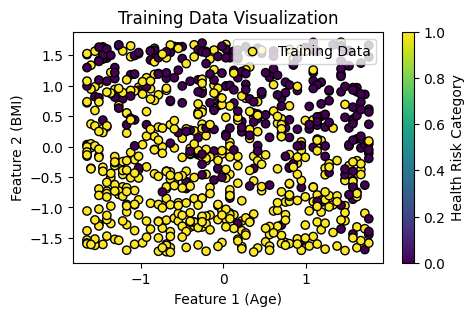

In [55]:
# Visualize the training data
plt.figure(figsize=(5, 3))
plt.scatter(X_train_class[:, 0], X_train_class[:, 1], c=y_train_class, cmap='viridis', edgecolor='k', label='Training Data')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (BMI)')
plt.title('Training Data Visualization')
plt.colorbar(label='Health Risk Category')
plt.legend()
plt.show()

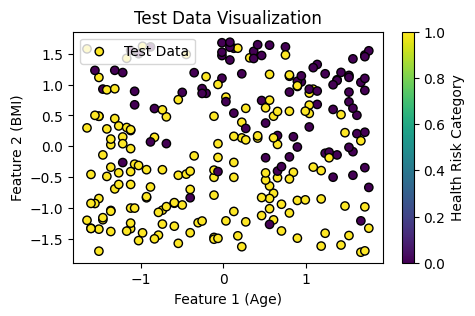

In [56]:
# Visualize the test data
plt.figure(figsize=(5, 3))
plt.scatter(X_test_class[:, 0], X_test_class[:, 1], c=y_test_class, cmap='viridis', edgecolor='k', label='Test Data')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (BMI)')
plt.title('Test Data Visualization')
plt.colorbar(label='Health Risk Category')
plt.legend()
plt.show()

## Fitting the KNN Classifier

We will fit the KNN classifier to the training set.

In [38]:
# Fitting the KNN classifier to the Training set
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train_class, y_train_class)

KNeighborsClassifier()

## Predicting the Test Set Results

We will predict the test set results using the trained KNN classifier.

In [39]:
# Predicting the Test set results
y_pred_class = knn_classifier.predict(X_test_class)

## Calculating the Accuracy

We will calculate the accuracy of the KNN classifier on the test set.

In [40]:
# Calculating the accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.912


## Making the Confusion Matrix

We will create a confusion matrix to evaluate the performance of the KNN classifier.

### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with those predicted by the model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

Here is the confusion matrix for our classification model:

- **True Positives (TP)**: The number of correct predictions that an instance is positive.
- **True Negatives (TN)**: The number of correct predictions that an instance is negative.
- **False Positives (FP)**: The number of incorrect predictions that an instance is positive.
- **False Negatives (FN)**: The number of incorrect predictions that an instance is negative.

The confusion matrix helps us understand how well our classification model is performing and where it might be making errors. It provides insights into the types of errors being made and can be used to calculate various performance metrics such as accuracy, precision, recall, and F1-score.

### Visual Representation

Below is the visual representation of the confusion matrix using a heatmap:

This heatmap provides a visual representation of the confusion matrix, making it easier to interpret the results. The diagonal elements represent the correctly classified instances, while the off-diagonal elements represent the misclassified instances.

Confusion Matrix for Classification:


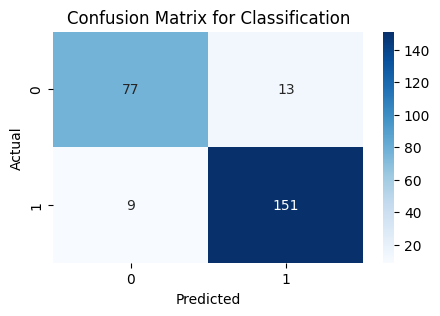

In [41]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix for Classification:")

# Get unique labels
labels = np.unique(y_classification)

# Presenting the Confusion Matrix using seaborn heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Classification')
plt.show()

## Classification Report

The classification report provides key metrics to evaluate the performance of a classification model. Here are the metrics included in the report:

### Detailed Metrics

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are actually positive.
- **Recall**: The ratio of correctly predicted positive observations to the all observations in the actual class. It indicates how many of the actual positive instances are captured by the model.
- **F1-Score**: The weighted average of Precision and Recall. It provides a balance between Precision and Recall.
- **Support**: The number of actual occurrences of the class in the dataset.


### Overall Metrics

- **Accuracy**: The ratio of correctly predicted instances to the total instances. It indicates the overall effectiveness of the model.

- **Macro Average**: The average of Precision, Recall, and F1-Score calculated for each class independently and then averaged.

- **Weighted Average**: The average of Precision, Recall, and F1-Score calculated for each class, weighted by the number of instances in each class.

In [42]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        90
           1       0.92      0.94      0.93       160

    accuracy                           0.91       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.91      0.91       250



## Visualising the Decision Boundary

We will visualize the decision boundary of the KNN classifier using the first two features (Age and BMI) for simplicity.

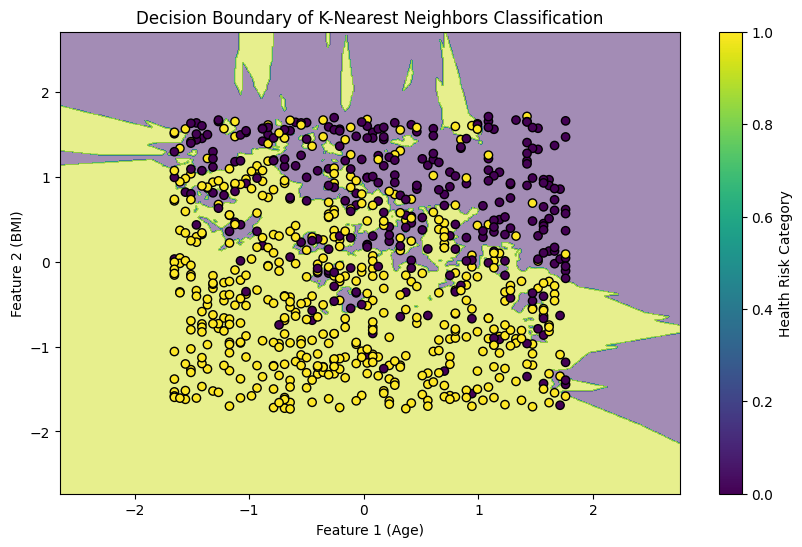

In [58]:
# Visualize decision boundaries using only the first two features for simplicity
X_set, y_set = X_train_class[:, :2], y_train_class  # Using only the first two features for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Create a new classifier using only the first two features for visualization purposes
knn_classifier_vis = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier_vis.fit(X_set, y_set)

Z = knn_classifier_vis.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (BMI)')
plt.title('Decision Boundary of K-Nearest Neighbors Classification')
plt.colorbar(label='Health Risk Category')
plt.show()

# <span style="color: red;">1. Classification Homework Assignment</span>

### Objective:
Explore the impact of different distance measures and values of K on the performance of the K-Nearest Neighbors classifier.

### Instructions:
1. Use three different distance measures: 'euclidean', 'manhattan', and 'chebyshev'.
2. Use three different values of K: 1 , 3, and 5.
3. For each combination of distance measure and K value:
   - Train the K-Nearest Neighbors classifier.
   - Display the confusion matrix and classification report.
   - Visualize the decision boundaries using only the first two features (Age and BMI).

# <span style="color: blue;">2. KNN Regression</span>

**Objective**: Predict the health risk score of individuals based on features such as age, BMI, exercise frequency, cholesterol level, and blood pressure.

## Selecting Features and Target Variable

We will select the relevant features and the target variable for the regression task.

In [59]:
# KNN Regression

# Selecting features and target variable
X = dataset[['Age', 'BMI', 'Exercise Frequency', 'Cholesterol Level', 'Blood Pressure']].values
y_regression = dataset['Health Risk Score'].values

## Splitting the Dataset

We will split the dataset into the training set and test set.

In [60]:
# Splitting the dataset into the Training set and Test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.25, random_state=0)

## Feature Scaling

We will scale the features to ensure they are on the same scale.

In [61]:
# Feature Scaling
sc_reg = StandardScaler()
X_train_reg = sc_reg.fit_transform(X_train_reg)
X_test_reg = sc_reg.transform(X_test_reg)

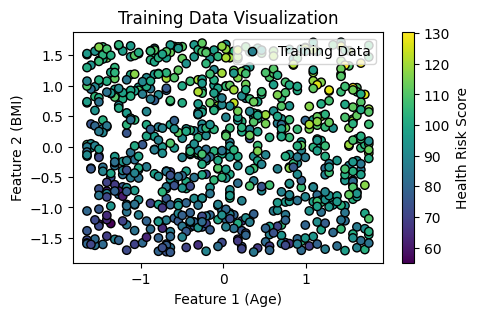

In [63]:
# Visualize the training data
plt.figure(figsize=(5, 3))
plt.scatter(X_train_reg[:, 0], X_train_reg[:, 1], c=y_train_reg, cmap='viridis', edgecolor='k', label='Training Data')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (BMI)')
plt.title('Training Data Visualization')
plt.colorbar(label='Health Risk Score')
plt.legend()
plt.show()

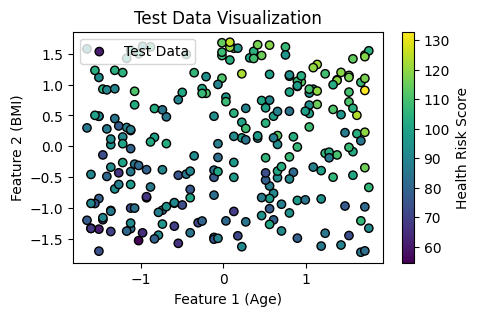

In [64]:
# Visualize the test data
plt.figure(figsize=(5, 3))
plt.scatter(X_test_reg[:, 0], X_test_reg[:, 1], c=y_test_reg, cmap='viridis', edgecolor='k', label='Test Data')
plt.xlabel('Feature 1 (Age)')
plt.ylabel('Feature 2 (BMI)')
plt.title('Test Data Visualization')
plt.colorbar(label='Health Risk Score')
plt.legend()
plt.show()

## Fitting the KNN Regressor

We will fit the KNN regressor to the training set.

In [69]:
# Fitting the KNN regressor to the Training set
knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_regressor.fit(X_train_reg, y_train_reg)

KNeighborsRegressor()

## Predicting the Test Set Results

We will predict the test set results using the trained KNN regressor.

In [70]:
# Predicting the Test set results
y_pred_reg = knn_regressor.predict(X_test_reg)

## Evaluating Regression Performance

To evaluate the performance of our regression model, we calculate several key metrics:

- **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing error in the same units as the target variable. It is more interpretable than MSE and a lower RMSE indicates a better fit.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between the actual and predicted values. It is less sensitive to outliers than MSE and RMSE. A lower MAE indicates a better fit.
- **R-squared (R²) Score**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score closer to 1 indicates a better fit.

In [72]:
# Calculating regression metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Mean Squared Error (MSE): {mse}")
print(f"Regression Root Mean Squared Error (RMSE): {rmse}")
print(f"Regression Mean Absolute Error (MAE): {mae}")
print(f"Regression R-squared (R²) Score: {r2}")

Regression Mean Squared Error (MSE): 9.453851699695447
Regression Root Mean Squared Error (RMSE): 3.0747116449669627
Regression Mean Absolute Error (MAE): 2.391843529072707
Regression R-squared (R²) Score: 0.9514428429890706


## Visualising the Results

We will visualize the results of the KNN regression with a scatter plot and a regression line.

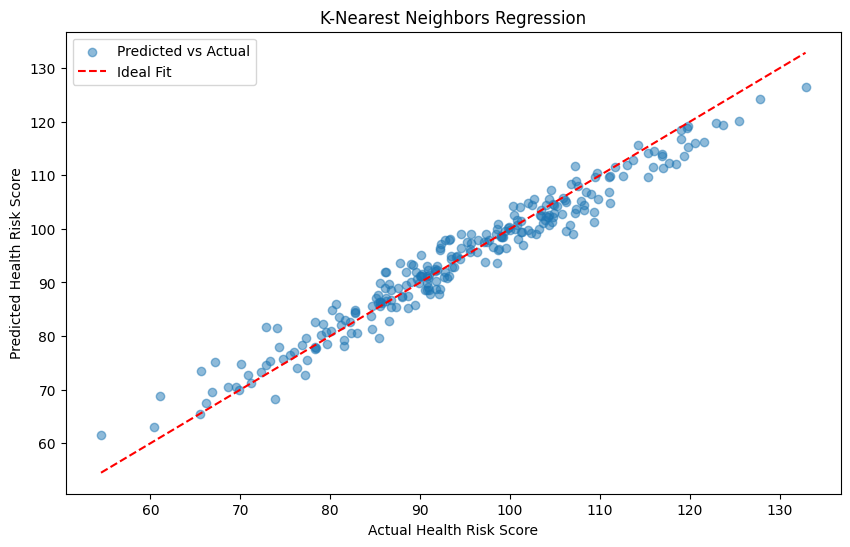

In [73]:
# Visualising the results with a scatter plot and a regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Health Risk Score')
plt.ylabel('Predicted Health Risk Score')
plt.title('K-Nearest Neighbors Regression')
plt.legend()
plt.show()

# <span style="color: red;">2. Regression Homework Assignment</span>

## Objective:
Explore the impact of different distance measures and values of K on the performance of the K-Nearest Neighbors regressor.

## Instructions:
1. Use three different distance measures: 'euclidean', 'manhattan', and 'chebyshev'.
2. Use three different values of K: 1 , 3, and 5.
3. For each combination of distance measure and K value:
    - Train the K-Nearest Neighbors regressor.
    - Display various performance metrics scores.
    - Visualize the regression curve using a scatter plot of the actual vs. predicted values.
